# <font color='red'>Clustering</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>

4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$
where N= number of clusters
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes)
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

# Implementation

### install packages

In [ ]:
!pip install networkx==2.3
!pip install stellargraph

     |████████████████████████████████| 1.8MB 6.0MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=c71c4ca8f4260c1df8e7b0c59ea9b0863885c81baafbd5152e63251e3e64c8d6
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
     |████████████████████████████████| 440kB 8.4MB/s 


### 1.Loading Data

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Assignments/As14_Clustering Assignment on Graph dataset/'
data=pd.read_csv(filepath+'movie_actor_network.csv', index_col=False, names=['movie','actor'])
print(data.shape)
data.head(2)

(9650, 2)


,movie,actor
0,m1,a1
1,m2,a1


### 2. EDA

In [ ]:
data.describe()

,movie,actor
count,9650,9650
unique,1292,3411
top,m1094,a973
freq,77,197


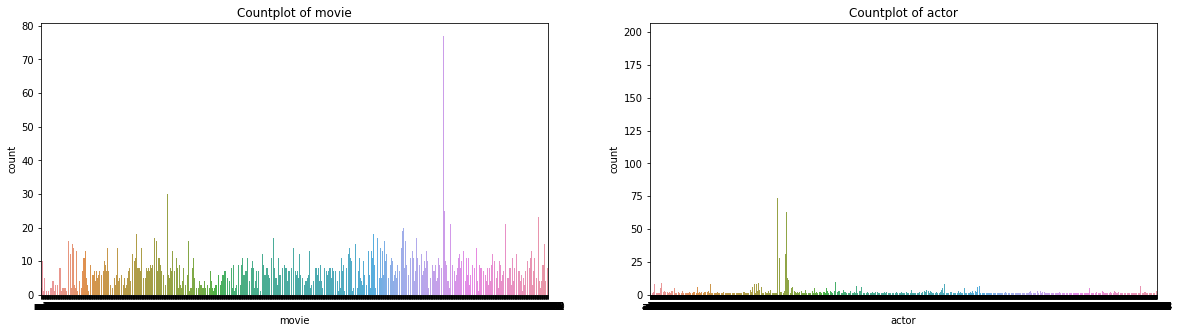

In [ ]:
import seaborn as sns
# Distribution of movie nodes
plt.figure(figsize = (20, 5))
plt.subplot(121)
sns.countplot(data['movie']).set_title('Countplot of movie')

# Distribution of actor nodes
plt.subplot(122)
sns.countplot(data['actor']).set_title('Countplot of actor')
plt.show()

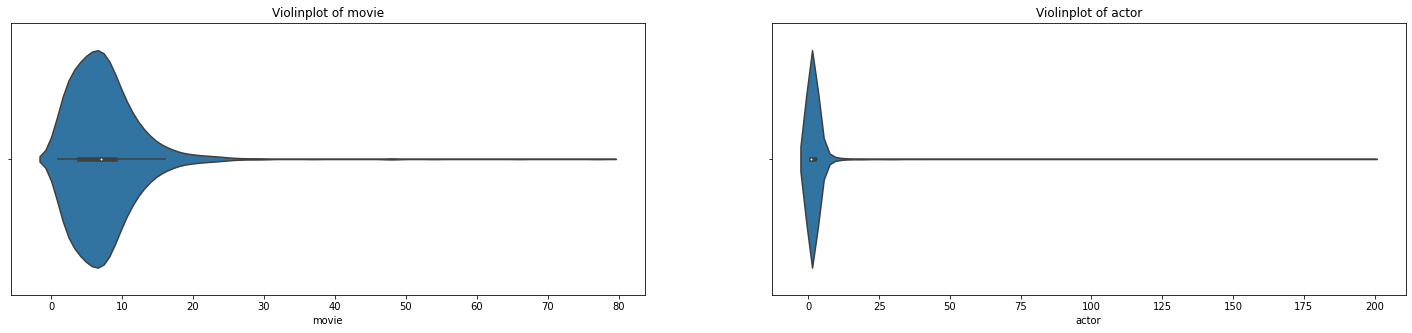

In [ ]:
# Violin plot of movie
plt.figure(figsize = (25, 5))
plt.subplot(121)
sns.violinplot(data['movie'].value_counts()).set_title('Violinplot of movie')

# Violin plot of actor
plt.subplot(122)
sns.violinplot(data['actor'].value_counts()).set_title('Violinplot of actor')
plt.show()

Observation:

  1. Most of the movies are repeated less than 20 times
  2. Most of the actors are repeated 15 times

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


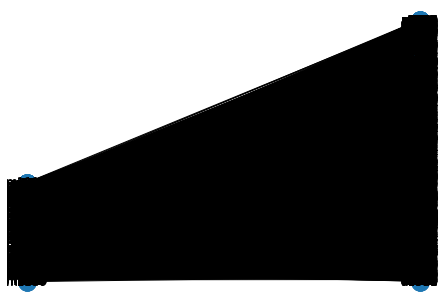

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

### 3. Representation of nodes as vectors

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [ ]:
print(node_ids[:15], end='')
print('\n')
print(node_targets[:15], end='')

['a973', 'a967', 'a964', 'a1731', 'a970', 'a969', 'a1028', 'a1057', 'm1094', 'a965', 'a1003', 'm1111', 'm67', 'a966', 'a959']

['actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'movie', 'actor', 'actor', 'movie', 'movie', 'actor', 'actor']

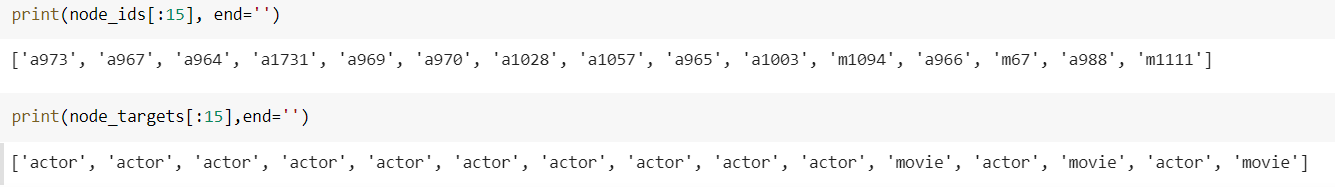

### 4. Functions

In [ ]:
# def data_split(node_ids,node_targets,node_embeddings):
#     '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
#     actor_nodes,movie_nodes=[],[]
#     actor_embeddings,movie_embeddings=[],[]
#     # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
#     # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
#     # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

#     return actor_nodes, movie_nodes, actor_embeddings, movie_embeddings

In [ ]:
def data_split(node_ids,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''

    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]

    # For each node, movie_node if 'm' in id or actor node if 'a' in id
    for ind, node_id in enumerate(node_ids):
        if 'm' in node_id:
            movie_nodes.append(node_id)
            movie_embeddings.append(node_embeddings[ind])
        if 'a' in node_id:
            actor_nodes.append(node_id)
            actor_embeddings.append(node_embeddings[ind])

    return actor_nodes, movie_nodes, actor_embeddings, movie_embeddings

In [ ]:
actor_nodes, movie_nodes, actor_embeddings, movie_embeddings = data_split(node_ids, node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''

    # https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html#networkx.algorithms.components.connected.connected_component_subgraphs
    num_nodes_largest_connected_comp = len(max(nx.connected_component_subgraphs(graph), key = len).nodes())
    total_num_nodes = len(graph.nodes())
    cost1 = (num_nodes_largest_connected_comp/total_num_nodes) / number_of_clusters

    return cost1

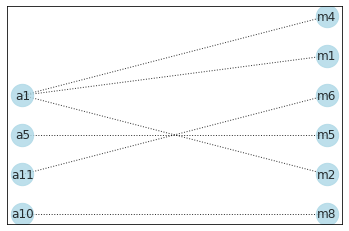

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11', 'm6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''

    sum_of_degrees_actor_movie = graph.number_of_edges()
    num_of_unique_movie_nodes = len(set([edge[1] for edge in graph.edges]))
    cost2= (sum_of_degrees_actor_movie / num_of_unique_movie_nodes) / number_of_clusters

    return cost2

<font color='cyan'>Grader function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [ ]:
# https://stackoverflow.com/questions/36195457/how-to-get-the-samples-in-each-cluster#:~:text=6%20Answers&text=I%20had%20a%20similar%20requirement,and%20the%20labels%20as%20columns.&text=As%20you%20can%20see%20first,last%20point%20in%20cluster%200%20.&text=The%20second%20row%20returns%20all,to%20the%200%20th%20cluster.

def Cluster_Indices(cluster_number, labels):
    return np.where(labels == cluster_number)[0]

In [ ]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for k in number_of_clusters:
    kmeans = KMeans(k)
    kmeans.fit(actor_embeddings)
    labels = kmeans.labels_

    cost = 0
    for i in range(k):  # For each cluster
        cluster_actor_nodes = np.array(actor_nodes)[Cluster_Indices(i, labels)] # actor nodes belonging to that cluster
        cluster_edges = [edge[::-1] for edge in edges if edge[1] in cluster_actor_nodes] # Edges for each actor in the cluster
        cluster_movie_nodes = set(np.array(cluster_edges)[:,1])  # movie nodes belonging to that cluster

        G = nx.Graph()
        G.add_nodes_from(cluster_actor_nodes, bipartite=0, label = 'actor')  # Adding nodes from actors in the cluster
        G.add_nodes_from(cluster_movie_nodes, bipartite=1, label = 'movie')  # Adding nodes from movie in the cluster
        G.add_edges_from(cluster_edges, label = 'acted')  # edges in the cluster

        # print('{} cluster  :  cost1 {} , cost2 , {}'.format(i, round(cost1(G,k),3) , round(cost2(G,k),3)))
        cost += (cost1(G, k) * cost2(G,k))

    print('{} cluster model total cost : {}'.format(k, round(cost,3)))

3 cluster model total cost : 1.261
5 cluster model total cost : 0.585
10 cluster model total cost : 0.22
30 cluster model total cost : 0.058
50 cluster model total cost : 0.03
100 cluster model total cost : 0.015
200 cluster model total cost : 0.008
500 cluster model total cost : 0.004


In [ ]:
# Fitting clustering algo with optimal K
cluster_algo = KMeans(3)
cluster_algo.fit(actor_embeddings)
labels = cluster_algo.labels_

<font color='blue'>Displaying similar actor clusters</font>

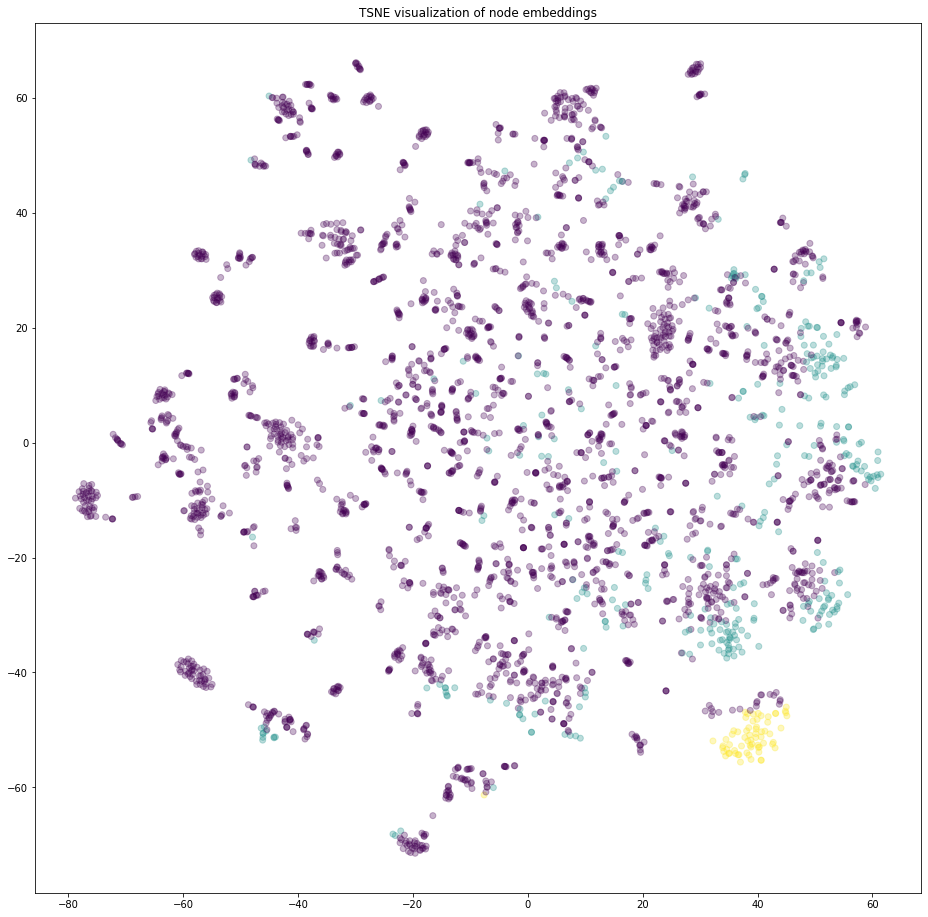

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(labels))}
node_colours = [ label_map[target] for target in labels]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

<font color='blue'>Grouping similar movies</font>

In [ ]:
number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for k in number_of_clusters:
    kmeans = KMeans(k)
    kmeans.fit(movie_embeddings)
    labels = kmeans.labels_

    cost = 0
    for i in range(k): # For each cluster
        cluster_movie_nodes = np.array(movie_nodes)[Cluster_Indices(i, labels)]   # movie nodes in the cluster
        cluster_edges = [edge for edge in edges if edge[0] in cluster_movie_nodes]  # adding edges in the cluster
        cluster_actor_nodes = set(np.array(cluster_edges)[:,1])   # actor nodes in the cluster

        G = nx.Graph()
        G.add_nodes_from(cluster_movie_nodes, bipartite=0, label = 'movie')   # Adding nodes from movie in the cluster
        G.add_nodes_from(cluster_actor_nodes, bipartite=1, label = 'actor')   # Adding nodes from actor in the cluster
        G.add_edges_from(cluster_edges, label = 'acted')

        # print('{} cluster  :  cost1 {} , cost2 , {}'.format(i, round(cost1(G,k),3) , round(cost2(G,k),3)))
        cost += (cost1(G, k) * cost2(G,k))

    print('{} cluster model total cost : {}'.format(k, round(cost,3)))

3 cluster model total cost : 0.901
5 cluster model total cost : 0.454
10 cluster model total cost : 0.284
30 cluster model total cost : 0.071
50 cluster model total cost : 0.037
100 cluster model total cost : 0.016
200 cluster model total cost : 0.007
500 cluster model total cost : 0.002


<font color='blue'>Displaying similar movie clusters</font>

In [ ]:
# Fitting clustering algo with optimal k
cluster_algo = KMeans(3)
cluster_algo.fit(movie_embeddings)
labels = cluster_algo.labels_

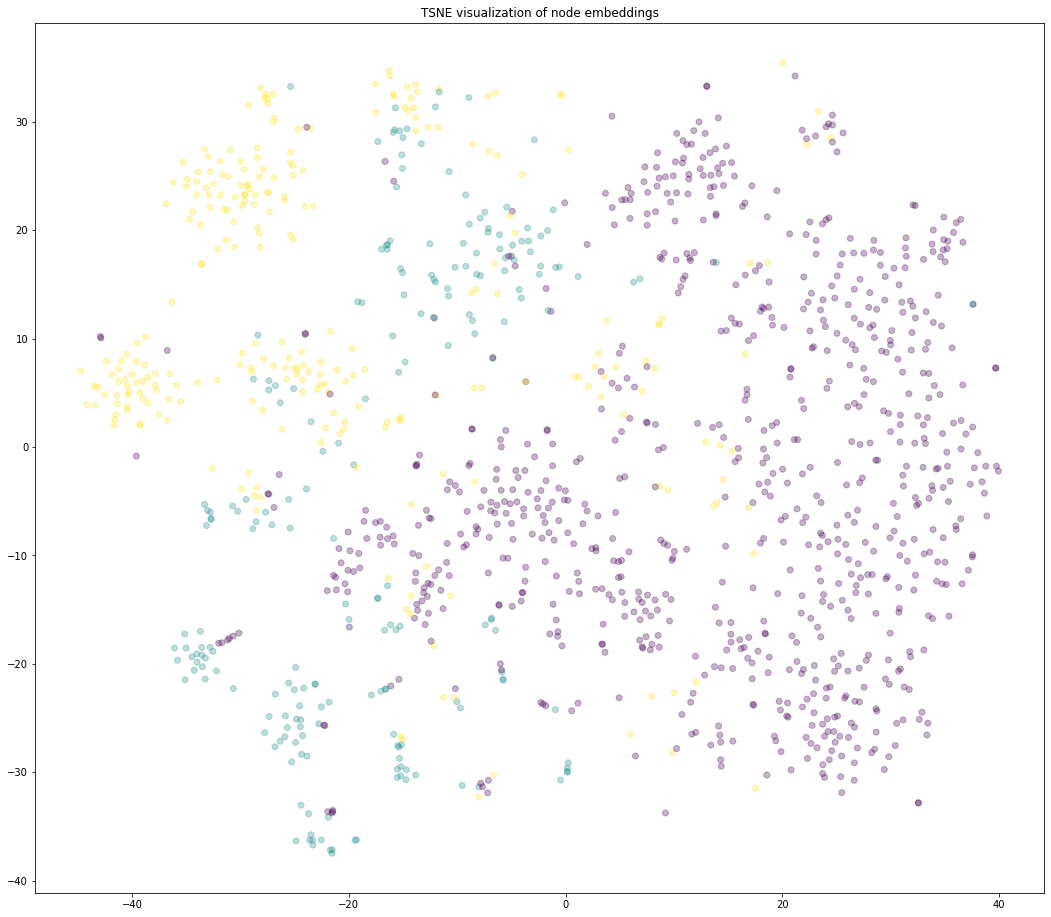

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

import numpy as np
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(labels))}
node_colours = [ label_map[target] for target in labels]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0],
            node_embeddings_2d[:,1],
            c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()